In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
# file_path = "/data/lux70/data/pfam/pfam2go.txt"
# lines = []

# data = {
#     "pfam_id": [],
#     "GO_term": [],
#     "GO_id": [],
# }

# with open(file_path, "r") as f:
#     for i, line in enumerate(f):
#         # if i > 15:
#         #     break
#         if line[0] != "!":
#             lines.append(line.rstrip("\n"))
#             pfam_id = line.split(" ")[0][5:]
#             go_str = line.split(" > ")[-1]
#             go_term = go_str.split(" ; ")[0][3:]
#             go_id = go_str.split(" ; ")[1].rstrip("\n")

#             data['pfam_id'].append(pfam_id)
#             data['GO_term'].append(go_term)
#             data['GO_id'].append(go_id)

# data = pd.DataFrame(data)
# data

In [11]:
file_path = "/data/lux70/data/pfam/gene_ontology.txt"

data = pd.read_csv(file_path, sep="\t", header=None)
data.columns = ["pfam_id", "GO_id", "GO_term", "GO_level"]
data

,pfam_id,GO_id,GO_term,GO_level
0,PF00131,GO:0046872,metal ion binding,function
1,PF00031,GO:0004869,cysteine-type endopeptidase inhibitor activity,function
2,PF16845,GO:0004869,cysteine-type endopeptidase inhibitor activity,function
3,PF00522,GO:0042025,host cell nucleus,component
4,PF00522,GO:0019058,viral life cycle,process
...,...,...,...,...
9979,PF21201,GO:0090729,toxin activity,function
9980,PF21201,GO:0015459,potassium channel regulator activity,function
9981,PF20661,GO:0005515,protein binding,function
9982,PF17411,GO:0009036,type II site-specific deoxyribonuclease activity,function


In [12]:
pfam_id_value_counts = data.pfam_id.value_counts().reset_index()
pfam_id_value_counts

,pfam_id,count
0,PF15454,10
1,PF01601,7
2,PF09456,7
3,PF03276,7
4,PF02155,7
...,...,...
5207,PF01328,1
5208,PF00731,1
5209,PF01668,1
5210,PF00612,1


<Axes: >

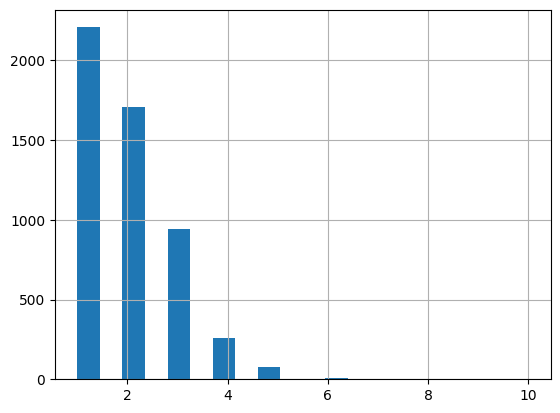

In [13]:
pfam_id_value_counts['count'].hist(bins=20)

In [14]:
data[data.pfam_id == "PF15454"]

,pfam_id,GO_id,GO_term,GO_level
9380,PF15454,GO:0031902,late endosome membrane,component
9381,PF15454,GO:0016197,endosomal transport,process
9382,PF15454,GO:0007040,lysosome organization,process
9383,PF15454,GO:0045121,membrane raft,component
9384,PF15454,GO:0071986,Ragulator complex,component
9385,PF15454,GO:0043410,positive regulation of MAPK cascade,process
9386,PF15454,GO:0001919,regulation of receptor recycling,process
9387,PF15454,GO:0071230,cellular response to amino acid stimulus,process
9388,PF15454,GO:0032008,positive regulation of TOR signaling,process
9389,PF15454,GO:0042632,cholesterol homeostasis,process


In [15]:
# go_value_counts = data.GO_term.value_counts().reset_index()
# go_value_counts.to_csv("/data/lux70/data/pfam/go_counts.csv", index=False)

go_value_counts = data.GO_id.value_counts().reset_index()
print(go_value_counts.shape)
go_value_counts.head(n=10)

(2629, 2)


,GO_id,count
0,GO:0016020,541
1,GO:0003677,320
2,GO:0005576,203
3,GO:0006355,182
4,GO:0005524,178
5,GO:0005634,149
6,GO:0005515,122
7,GO:0003723,118
8,GO:0005737,103
9,GO:0008270,101


<Axes: >

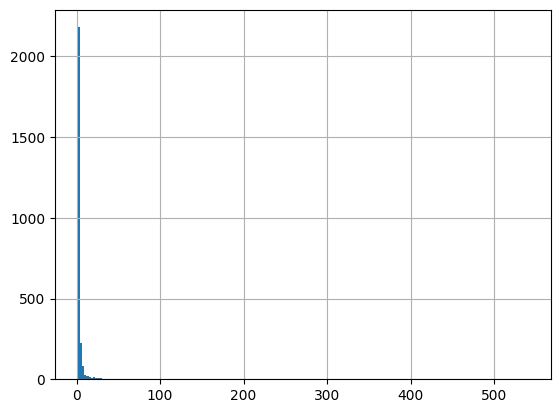

In [16]:
go_value_counts['count'].hist(bins=200)

In [17]:
data = data.merge(go_value_counts, on="GO_id")
data

,pfam_id,GO_id,GO_term,GO_level,count
0,PF00131,GO:0046872,metal ion binding,function,48
1,PF00031,GO:0004869,cysteine-type endopeptidase inhibitor activity,function,3
2,PF16845,GO:0004869,cysteine-type endopeptidase inhibitor activity,function,3
3,PF00522,GO:0042025,host cell nucleus,component,7
4,PF00522,GO:0019058,viral life cycle,process,14
...,...,...,...,...,...
9979,PF21201,GO:0090729,toxin activity,function,13
9980,PF21201,GO:0015459,potassium channel regulator activity,function,1
9981,PF20661,GO:0005515,protein binding,function,122
9982,PF17411,GO:0009036,type II site-specific deoxyribonuclease activity,function,24


In [18]:
idx = data.groupby('pfam_id')['count'].idxmin()
data = data.iloc[idx]

In [19]:
data

,pfam_id,GO_id,GO_term,GO_level,count
203,PF00001,GO:0004930,G protein-coupled receptor activity,function,11
669,PF00002,GO:0004930,G protein-coupled receptor activity,function,11
8088,PF00003,GO:0004930,G protein-coupled receptor activity,function,11
2935,PF00004,GO:0016887,ATP hydrolysis activity,function,15
2589,PF00005,GO:0016887,ATP hydrolysis activity,function,15
...,...,...,...,...,...
6929,PF21665,GO:0009306,protein secretion,process,11
4124,PF21729,GO:0045492,xylan biosynthetic process,process,1
9822,PF21730,GO:0070072,vacuolar proton-transporting V-type ATPase com...,process,4
9975,PF21767,GO:0005515,protein binding,function,122


In [20]:
go_to_idx_mapping = dict(zip(data.GO_id.unique(), np.arange(len(data.GO_id.unique()))))
data['GO_idx'] = data['GO_id'].map(lambda x: go_to_idx_mapping[x])

/tmp/ipykernel_1021147/3632142329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GO_idx'] = data['GO_id'].map(lambda x: go_to_idx_mapping[x])


In [21]:
data

,pfam_id,GO_id,GO_term,GO_level,count,GO_idx
203,PF00001,GO:0004930,G protein-coupled receptor activity,function,11,0
669,PF00002,GO:0004930,G protein-coupled receptor activity,function,11,0
8088,PF00003,GO:0004930,G protein-coupled receptor activity,function,11,0
2935,PF00004,GO:0016887,ATP hydrolysis activity,function,15,1
2589,PF00005,GO:0016887,ATP hydrolysis activity,function,15,1
...,...,...,...,...,...,...
6929,PF21665,GO:0009306,protein secretion,process,11,123
4124,PF21729,GO:0045492,xylan biosynthetic process,process,1,2218
9822,PF21730,GO:0070072,vacuolar proton-transporting V-type ATPase com...,process,4,1706
9975,PF21767,GO:0005515,protein binding,function,122,10


In [22]:
len(go_to_idx_mapping)

2219